## Saliency Map Visualization

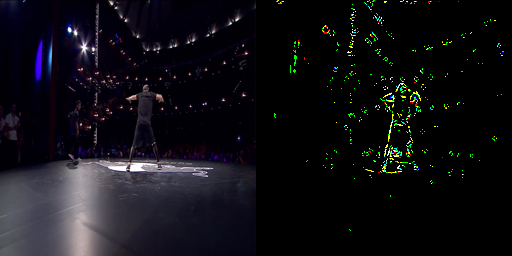

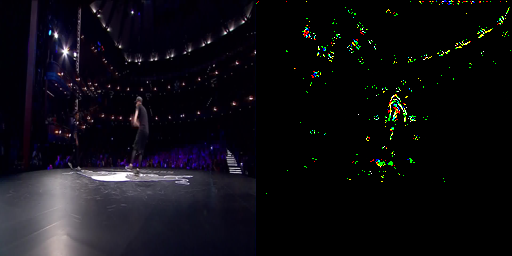

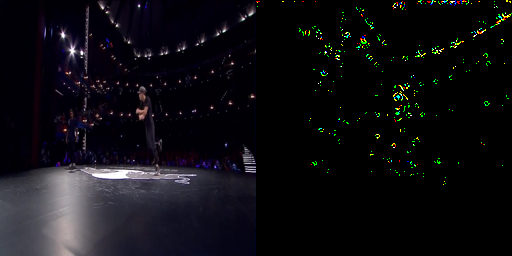

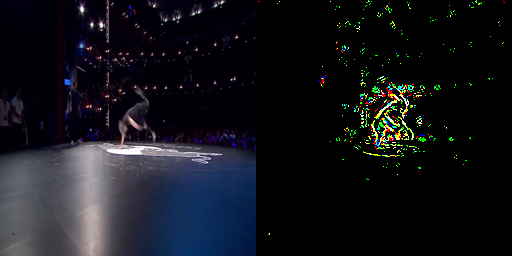

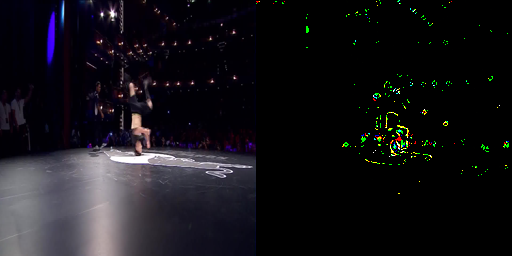

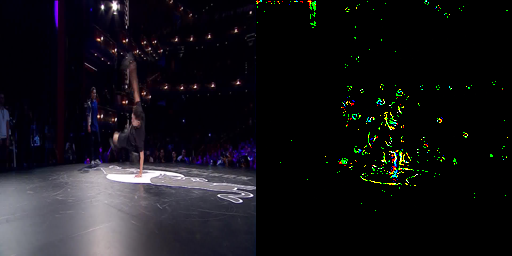

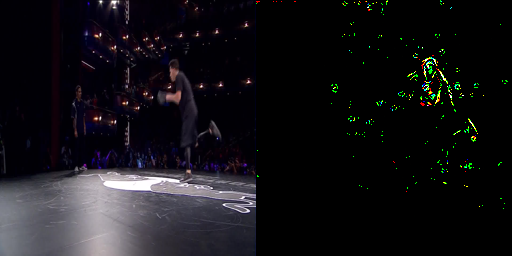

In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import json
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
from model import *
from dataset import *
from utils import *
from run import make_paths
from PIL import Image
from visualizations.guided_backprop import *
from visualizations.misc_functions import *

# some fixed paths
image_dataset = rawImageDataset("/mnt/disks/disk1/processed/test_index.csv")

# Key: name, value: # frames
video_examples = { 
    "break/ndUDTMBzJmU_020" : 301 
}

# Load trained models
model = ModelChooser("resnet18_features", 0)
GBP = GuidedBackprop(model)

for video in video_examples:
    max = video_examples[video]
    for i in range(1, max+1, 50):
        img_path = f"/mnt/disks/disk1/raw/rgb/{video}_{i:04d}.jpg"
        orig_img = Image.open(img_path).resize((256, 256))
        # Grab transformed X
        X = image_dataset.get_X(img_path).unsqueeze(0)
        X.requires_grad_()
        # Get gradients
        feature_select = 0
        guided_grads = GBP.generate_gradients(X, feature_select)
        # Save colored gradients
        save_gradient_images(guided_grads, f'img_{i}' + '_Guided_BP_color')
        #Visualize
        guided_grads = format_np_output(guided_grads)
        grad_img = Image.fromarray(guided_grads)
        #Make side by side image
        new_img = Image.new('RGB', (512, 256))
        new_img.paste(orig_img, (0, 0))
        new_img.paste(grad_img, (256, 0))
        display(new_img)
